# Комп'ютерний практикум

In [1]:
import hashlib as hl                    # sha1
import secrets as rnd                   # randbelow, choice
import os, sys                          # output and logging
import numpy as np, scipy.stats as sp   # stats calculations
import matplotlib.pyplot as plt         # plotting

In [2]:
# Some hardcoded stuff specifically for sha1
text = ' \t\n\r\v\fabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
punct = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
ALPH = text + punct

PIA_CMP_PREF_C = 40 - 4    # 4 chars to compare in the end
BDA_CMP_PREF_C = 40 - 8    # 8 chars to compare in the end

PIA_CMP_PREF_B = 20 - 2    # 2 bytes to compare in the end
BDA_CMP_PREF_B = 20 - 4    # 4 bytes to compare in the end

N = 125                    # Iteration count

STD_OS = sys.stdout

gamma = 0.95               # Confidence value
# ------------------------------------------

BASE_MESSAGE_PARTS = ["Bondar", "Petro", "Olexandrovych", ""]

In [3]:
def gen_bm_sample(char_counts=[0, 0, 0, 0]):
    result_msg_parts = []

    for i in range(4):
        if char_counts[i] != 0:
            gen_part = str()
            for _ in range(char_counts[i]):
                gen_part += rnd.choice(ALPH[6:])
            result_msg_parts.append(gen_part)
        result_msg_parts.append(BASE_MESSAGE_PARTS[i])

    return "".join(result_msg_parts)

def random_modification(base: str):
    res = list(base)

    for i in range(len(res)):
        if rnd.randbelow(2) == 1:
            res[i] = rnd.choice(ALPH)

    return "".join(res)

def rand_count_vec():
    return ([rnd.randbelow(6),
             rnd.randbelow(6),
             rnd.randbelow(6),
             rnd.randbelow(6)])


### Атака пошуку другого прообразу 1

In [4]:
def preimage_attack_1(base_message: str, log=False, log_output='reports/preimage_attack_1.txt'):
    print(f"Base message is: {base_message}\n")
    # Formating parameters and output
    pw = len(base_message) + 7

    out = sys.stdout
    if log:
        out = open(log_output, 'w')
    #

    base_sha = hl.sha1(base_message.encode())
    base_sha_suff = base_sha.digest()[PIA_CMP_PREF_B:]
    base_sha_hex = base_sha.hexdigest()
    
    out.write(f"{base_message:{pw}s} : {base_sha_hex[:PIA_CMP_PREF_C]}\t{base_sha_hex[PIA_CMP_PREF_C:]}\n")
    if log: print(f"{base_message:{pw}s} : {base_sha_hex[:PIA_CMP_PREF_C]}\t{base_sha_hex[PIA_CMP_PREF_C:]}")
  
    app = 0
    while True:
        app += 1

        msg = base_message + str(app)
        msg_sha = hl.sha1(msg.encode())
        msg_sha_hex = msg_sha.hexdigest()

        out.write(f"{msg:{pw}s} : {msg_sha_hex[:PIA_CMP_PREF_C]}\t{msg_sha_hex[PIA_CMP_PREF_C:]}")

        if msg_sha.digest()[PIA_CMP_PREF_B:] == base_sha_suff:
            out.write(f"\nSecond preimage on {app}!")
            if log: 
                print(f"{msg:{pw}s} : {msg_sha_hex[:PIA_CMP_PREF_C]}\t{msg_sha_hex[PIA_CMP_PREF_C:]}", end='')
                print(f"\tSecond preimage on {app}!")
            
            break
        else:
            out.write('\n')

    if out != sys.stdout:
        out.close()
    
    return app

### Атака пошуку другого прообразу 2

In [5]:
def preimage_attack_2(base_message: str, log=False, log_output='reports/preimage_attack_2.txt'):
    print(f"Base message is: {base_message}\n")
    # Formating parameters
    pw = len(base_message) + 10

    out = sys.stdout
    if log:
        out = open(log_output, 'w')
    #

    base_sha = hl.sha1(base_message.encode())
    base_sha_suff = base_sha.digest()[PIA_CMP_PREF_B:]
    base_sha_hex = base_sha.hexdigest()

    out.write(f"{repr(base_message):{pw}s} : {base_sha_hex[:PIA_CMP_PREF_C]}\t{base_sha_hex[PIA_CMP_PREF_C:]}\n")
    if log: print(f"{repr(base_message):{pw}s} : {base_sha_hex[:PIA_CMP_PREF_C]}\t{base_sha_hex[PIA_CMP_PREF_C:]}")

    itr = 0
    while True:
        itr += 1
        msg = random_modification(base_message)
        msg_sha = hl.sha1(msg.encode())
        msg_sha_hex = msg_sha.hexdigest()

        out.write(f"{repr(msg):{pw}s} : {msg_sha_hex[:PIA_CMP_PREF_C]}\t{msg_sha_hex[PIA_CMP_PREF_C:]}")

        if msg_sha.digest()[PIA_CMP_PREF_B:] == base_sha_suff and msg != base_message:
            out.write(f"\nSecond preimage in {itr} iterations!")
            if log: 
                print(f"{repr(msg):{pw}s} : {msg_sha_hex[:PIA_CMP_PREF_C]}\t{msg_sha_hex[PIA_CMP_PREF_C:]}", end='')
                print(f"\tSecond preimage in {itr} iterations!")

            break
        else:
            out.write('\n')

    if out != sys.stdout:
        out.close()
    
    return itr
        

### Атака днів народжень 1

In [6]:
def birthday_attack_1(base_message: str, log=False, log_output='reports/birthday_attack_1.txt'):
    print(f"Base message is: {base_message}\n")
    # Formating parameters
    pw = len(base_message) + 6

    out = sys.stdout
    if log:
        out = open(log_output, 'w')
    #

    base_sha = hl.sha1(base_message.encode())
    base_sha_hex = base_sha.hexdigest()

    out.write(f"{base_message:{pw}s} : {base_sha_hex[:BDA_CMP_PREF_C]}\t{base_sha_hex[BDA_CMP_PREF_C:]}\n")
    if log: print(f"{base_message:{pw}s} : {base_sha_hex[:BDA_CMP_PREF_C]}\t{base_sha_hex[BDA_CMP_PREF_C:]}")

    prev_dict = {base_sha.digest()[BDA_CMP_PREF_B:]: base_message}
    app = 0
    while True:
        app += 1

        msg = base_message + str(app)
        
        msg_sha = hl.sha1(msg.encode())
        msg_sha_hex = msg_sha.hexdigest()
        msg_sha_suff = msg_sha.digest()[BDA_CMP_PREF_B:]

        if msg_sha_suff in prev_dict.keys():
            col = prev_dict[msg_sha_suff]
            col_sha = hl.sha1(col.encode())
            
            out.write(f"\nCollision found in {app} iterations!\n")
            out.write(f"Msg: {msg:{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}\n")
            out.write(f"Col: {col:{pw}s} : {col_sha.hexdigest()[:BDA_CMP_PREF_C]}\t{col_sha.hexdigest()[BDA_CMP_PREF_C:]}")
            if log: 
                print(f"\nCollision found in {app} iterations!")
                print(f"Msg: {msg:{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}")
                print(f"Col: {col:{pw}s} : {col_sha.hexdigest()[:BDA_CMP_PREF_C]}\t{col_sha.hexdigest()[BDA_CMP_PREF_C:]}")

            break
        else:
            out.write(f"{msg:{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}\n")
            prev_dict[msg_sha_suff] = msg
    
    if out != sys.stdout:
        out.close()
    
    return app

### Атака днів народжень 2

In [7]:
def birthday_attack_2(base_message: str, log=False, log_output='reports/birthday_attack_2.txt'):
    print(f"Base message is: {base_message}\n")
    # Formating parameters
    pw = len(base_message) + 8

    out = sys.stdout
    if log:
        out = open(log_output, 'w')
    #

    base_sha = hl.sha1(base_message.encode())
    base_sha_hex = base_sha.hexdigest()

    out.write(f"{repr(base_message):{pw}s} : {base_sha_hex[:BDA_CMP_PREF_C]}\t{base_sha_hex[BDA_CMP_PREF_C:]}\n")
    if log: print(f"{repr(base_message):{pw}s} : {base_sha_hex[:BDA_CMP_PREF_C]}\t{base_sha_hex[BDA_CMP_PREF_C:]}")

    prev_dict = {base_sha.digest()[BDA_CMP_PREF_B:]: base_message}
    itr = 0
    while True:
        itr += 1

        msg = random_modification(base_message)

        msg_sha = hl.sha1(msg.encode())
        msg_sha_hex = msg_sha.hexdigest()
        msg_sha_suff = msg_sha.digest()[BDA_CMP_PREF_B:]

        if msg_sha_suff in prev_dict.keys() and msg != base_message:
            col = prev_dict[msg_sha.digest()[BDA_CMP_PREF_B:]]
            col_sha = hl.sha1(col.encode())

            out.write(f"\nCollision found in {itr} iterations!\n")
            out.write(f"Msg: {repr(msg):{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}\n")
            out.write(f"Col: {repr(col):{pw}s} : {col_sha.hexdigest()[:BDA_CMP_PREF_C]}\t{col_sha.hexdigest()[BDA_CMP_PREF_C:]}")
            if log: 
                print(f"\nCollision found in {itr} iterations!")
                print(f"Msg: {repr(msg):{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}")
                print(f"Col: {repr(col):{pw}s} : {col_sha.hexdigest()[:BDA_CMP_PREF_C]}\t{col_sha.hexdigest()[BDA_CMP_PREF_C:]}")
                
            break
        else:
            out.write(f"{repr(msg):{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}\n")
            prev_dict[msg_sha_suff] = msg

    if out != sys.stdout:
        out.close()
    
    return itr

## Запуск атак

In [8]:
general_stats = {}

### Атака пошуку другого прообразу 1

In [9]:
preimage_attack_1(gen_bm_sample([5, 0, 0, 0]), True)

Base message is: yEy^KBondarPetroOlexandrovych

yEy^KBondarPetroOlexandrovych        : 36995953a58c6ec92540891f9ac8fe0abe45	42bb
yEy^KBondarPetroOlexandrovych112655  : 34d2ce620504c36bdd41390031a3feceec7f	42bb	Second preimage on 112655!


112655

In [10]:
stats = []

with open(os.devnull, 'w') as f:
    sys.stdout = f
    for i in range(N):
        msg = gen_bm_sample(rand_count_vec())
        stats.append((msg, preimage_attack_1(msg, True, os.devnull)))
    sys.stdout = STD_OS

with open('reports/preimage_attack_1_stats.txt', 'w') as f:
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')
    f.write(f"| {'Start message':50s} | {'Iterations':10s} |\n")
    f.write('|' + ('-'*52) + '+' + ('-'*12) + '|\n')
    for msg, st in stats:
        f.write(f"| {repr(msg):50s} | {st:10} |\n")
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')

data = [count for _, count in stats]
sum_itr = np.sum(data)
mean_val = np.mean(data)
variance = np.var(data)

# Computing confidence interval
q = 1 - ((1 - gamma) / 2)   # quantile
s = np.sqrt(variance)
scale_t = sp.t.ppf(q, N - 1)    # N - 1 deqrees of freedom
confidence_interval = (mean_val - (scale_t * s / np.sqrt(N)), mean_val + (scale_t * s / np.sqrt(N)))

print(f"Sum of iterations: {sum_itr}")
print(f"Mean: {mean_val}")
print(f"Variance: {variance} -> Standart deviance: {s}")
print(f"Confidence interval: {confidence_interval}")

general_stats["1.1"] = [sum_itr, mean_val, variance, s, confidence_interval, stats.copy()]

Sum of iterations: 8510558
Mean: 68084.464
Variance: 4195990107.0167046 -> Standart deviance: 64776.46260036669
Confidence interval: (56616.94460994736, 79551.98339005266)


### Атака пошуку другого прообразу 2

In [11]:
preimage_attack_2(gen_bm_sample([0, 5, 0, 0]), True)

Base message is: BondarX2Q/_PetroOlexandrovych

'BondarX2Q/_PetroOlexandrovych'         : 79ddc9b529dc47415433e28afa60077e213f	c7ea
'%\x0b[da\tX"Q/_Ielr[Ole/an :oNycB'     : e3647924a57b680dc58069221c996a40e1f1	c7ea	Second preimage in 64342 iterations!


64342

In [12]:
stats = []

with open(os.devnull, 'w') as f:
    sys.stdout = f
    for i in range(N):
        msg = gen_bm_sample(rand_count_vec())
        stats.append((msg, preimage_attack_2(msg, True, os.devnull)))
    sys.stdout = STD_OS

with open('reports/preimage_attack_2_stats.txt', 'w') as f:
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')
    f.write(f"| {'Start message':50s} | {'Iterations':10s} |\n")
    f.write('|' + ('-'*52) + '+' + ('-'*12) + '|\n')
    for msg, st in stats:
        f.write(f"| {repr(msg):50s} | {st:10} |\n")
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')

data = [count for _, count in stats]
sum_itr = np.sum(data)
mean_val = np.mean(data)
variance = np.var(data)

# Computing confidence interval
q = 1 - ((1 - gamma) / 2)   # quantile
s = np.sqrt(variance)
scale_t = sp.t.ppf(q, N - 1)    # N - 1 deqrees of freedom
confidence_interval = (mean_val - (scale_t * s / np.sqrt(N)), mean_val + (scale_t * s / np.sqrt(N)))

print(f"Sum of iterations: {sum_itr}")
print(f"Mean: {mean_val}")
print(f"Variance: {variance} -> Standart deviance: {s}")
print(f"Confidence interval: {confidence_interval}")

general_stats["1.2"] = [sum_itr, mean_val, variance, s, confidence_interval, stats.copy()]

Sum of iterations: 7505805
Mean: 60046.44
Variance: 2958650446.7904 -> Standart deviance: 54393.4779802726
Confidence interval: (50417.04317295489, 69675.83682704512)


### Атака днів народжень 1

In [13]:
birthday_attack_1(gen_bm_sample([0, 0, 5, 0]), True)

Base message is: BondarPetro.:l~XOlexandrovych

BondarPetro.:l~XOlexandrovych       : a76ab7569e3359a491320b210b6e580f	21838893

Collision found in 46577 iterations!
Msg: BondarPetro.:l~XOlexandrovych46577  : a5b6d86fcd58b93dce7de8e02a2c8302	1f677d02
Col: BondarPetro.:l~XOlexandrovych30497  : 9f7fda1ce691fff8e826815f543370f7	1f677d02


46577

In [14]:
stats = []

with open(os.devnull, 'w') as f:
    sys.stdout = f
    for i in range(N):
        msg = gen_bm_sample(rand_count_vec())
        stats.append((msg, birthday_attack_1(msg, True, os.devnull)))
    sys.stdout = STD_OS

with open('reports/birthday_attack_1_stats.txt', 'w') as f:
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')
    f.write(f"| {'Start message':50s} | {'Iterations':10s} |\n")
    f.write('|' + ('-'*52) + '+' + ('-'*12) + '|\n')
    for msg, st in stats:
        f.write(f"| {repr(msg):50s} | {st:10} |\n")
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')

data = [count for _, count in stats]
sum_itr = np.sum(data)
mean_val = np.mean(data)
variance = np.var(data)

# Computing confidence interval
q = 1 - ((1 - gamma) / 2)   # quantile
s = np.sqrt(variance)
scale_t = sp.t.ppf(q, N - 1)    # N - 1 deqrees of freedom
confidence_interval = (mean_val - (scale_t * s / np.sqrt(N)), mean_val + (scale_t * s / np.sqrt(N)))

print(f"Sum of iterations: {sum_itr}")
print(f"Mean: {mean_val}")
print(f"Variance: {variance} -> Standart deviance: {s}")
print(f"Confidence interval: {confidence_interval}")

general_stats["2.1"] = [sum_itr, mean_val, variance, s, confidence_interval, stats.copy()]

Sum of iterations: 9907865
Mean: 79262.92
Variance: 1624056090.0576 -> Standart deviance: 40299.57927891555
Confidence interval: (72128.59700303363, 86397.24299696636)


### Атака днів народжень 2

In [15]:
birthday_attack_2(gen_bm_sample([0, 0, 0, 5]), True)

Base message is: BondarPetroOlexandrovychQl}E8

'BondarPetroOlexandrovychQl}E8'       : 07a3e6bfe31c11c556095f8389da2c13	673c782d

Collision found in 82932 iterations!
Msg: 'B}nda`PW!E5Ole2and\noly^hA~SMU'      : b93ced206fdd8445018bc5ae74c5eb47	b43a63cf
Col: "+oNdu{-U4So\x0bO\r6androL0cPQz'E8"   : 4a53d33bd6b031df2f0d64096810f4d2	b43a63cf


82932

In [16]:
stats = []

with open(os.devnull, 'w') as f:
    sys.stdout = f
    for i in range(N):
        msg = gen_bm_sample(rand_count_vec())
        stats.append((msg, birthday_attack_2(msg, True, os.devnull)))
    sys.stdout = STD_OS

with open('reports/birthday_attack_2_stats.txt', 'w') as f:
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')
    f.write(f"| {'Start message':50s} | {'Iterations':10s} |\n")
    f.write('|' + ('-'*52) + '+' + ('-'*12) + '|\n')
    for msg, st in stats:
        f.write(f"| {repr(msg):50s} | {st:10} |\n")
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')

data = [count for _, count in stats]
sum_itr = np.sum(data)
mean_val = np.mean(data)
variance = np.var(data)

# Computing confidence interval
q = 1 - ((1 - gamma) / 2)   # quantile
s = np.sqrt(variance)
scale_t = sp.t.ppf(q, N - 1)    # N - 1 deqrees of freedom
confidence_interval = (mean_val - (scale_t * s / np.sqrt(N)), mean_val + (scale_t * s / np.sqrt(N)))

print(f"Sum of iterations: {sum_itr}")
print(f"Mean: {mean_val}")
print(f"Variance: {variance} -> Standart deviance: {s}")
print(f"Confidence interval: {confidence_interval}")

general_stats["2.2"] = [sum_itr, mean_val, variance, s, confidence_interval, stats.copy()]

Sum of iterations: 10003858
Mean: 80030.864
Variance: 1847598512.213504 -> Standart deviance: 42983.70054117612
Confidence interval: (72421.36512302114, 87640.36287697886)


### Візуалізація результатів

In [21]:
def plot_hist(data_array, atk):
    plt.figure(figsize=(15, 6))
    n, bins, _ = plt.hist(data_array, bins=20)
    print(n)

    plt.title(f"Iterations distribution for {atk}")
    plt.grid(True)
    plt.yticks(range(int(np.max(n)) + 1))
    plt.xlim([np.min(data_array) - 1000, np.max(data_array) + 1000])
    plt.xticks(bins)
    
    plt.savefig(f'reports/hist{atk}.png')
    plt.show(block=False)

Number of iterations: 125

Attack 1.1:
General number of iterations: 8510558
Mean value: 68084.464
Variance: 4195990107.0167046
Standart deviance: 64776.46260036669
Confidence interval: (56616.94460994736, 79551.98339005266)

[26. 30. 14. 18. 12.  7.  1.  5.  2.  2.  5.  2.  0.  0.  0.  0.  0.  0.
  0.  1.]


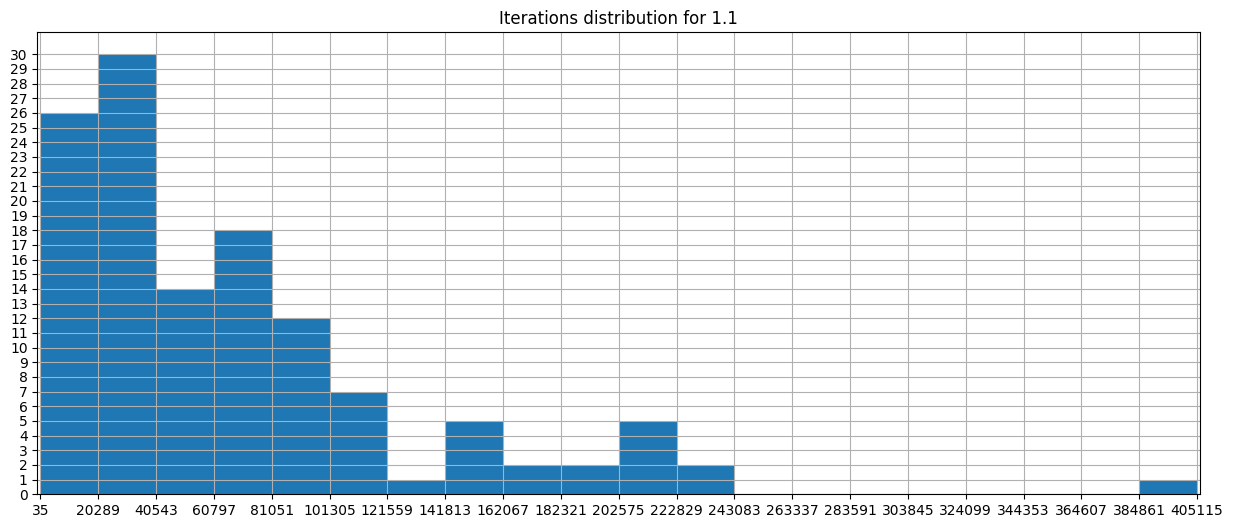

Attack 1.2:
General number of iterations: 7505805
Mean value: 60046.44
Variance: 2958650446.7904
Standart deviance: 54393.4779802726
Confidence interval: (50417.04317295489, 69675.83682704512)

[28. 21. 18. 12.  9.  9.  8.  2.  6.  4.  1.  4.  1.  1.  0.  0.  0.  0.
  0.  1.]


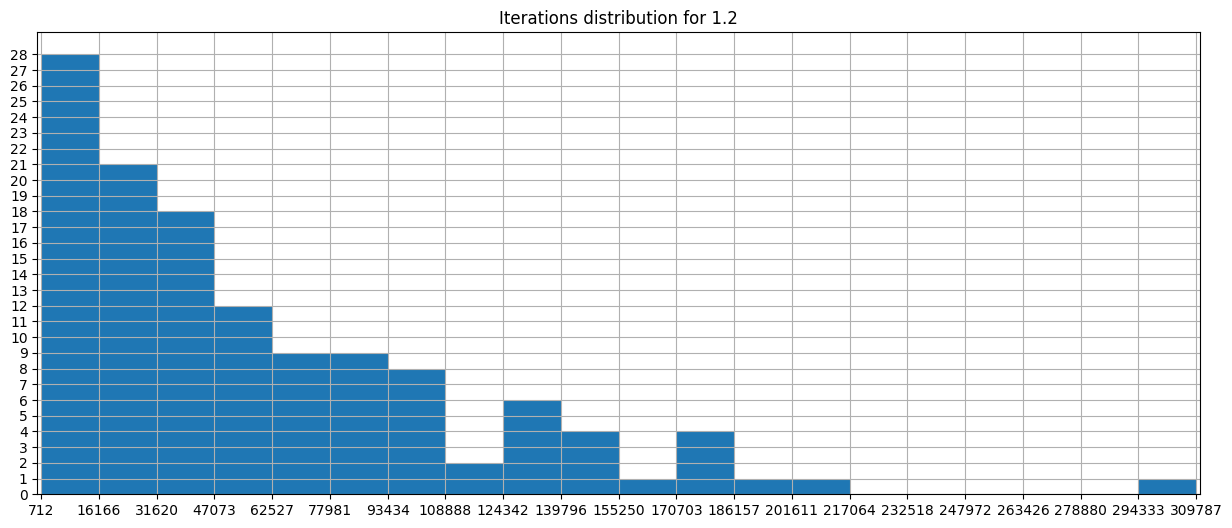

Attack 2.1:
General number of iterations: 9907865
Mean value: 79262.92
Variance: 1624056090.0576
Standart deviance: 40299.57927891555
Confidence interval: (72128.59700303363, 86397.24299696636)

[ 8. 10.  6. 17. 15. 16. 12. 13.  5.  7. 12.  3.  0.  0.  0.  0.  0.  0.
  0.  1.]


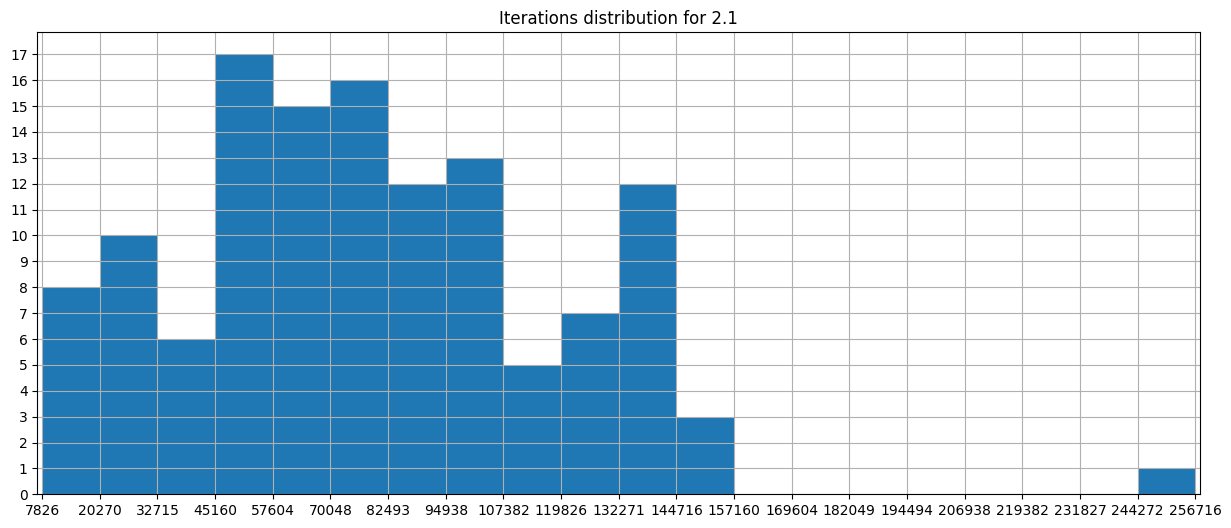

Attack 2.2:
General number of iterations: 10003858
Mean value: 80030.864
Variance: 1847598512.213504
Standart deviance: 42983.70054117612
Confidence interval: (72421.36512302114, 87640.36287697886)

[10.  8. 17. 10. 16. 12. 13.  7. 14.  5.  3.  1.  5.  1.  1.  0.  1.  0.
  0.  1.]


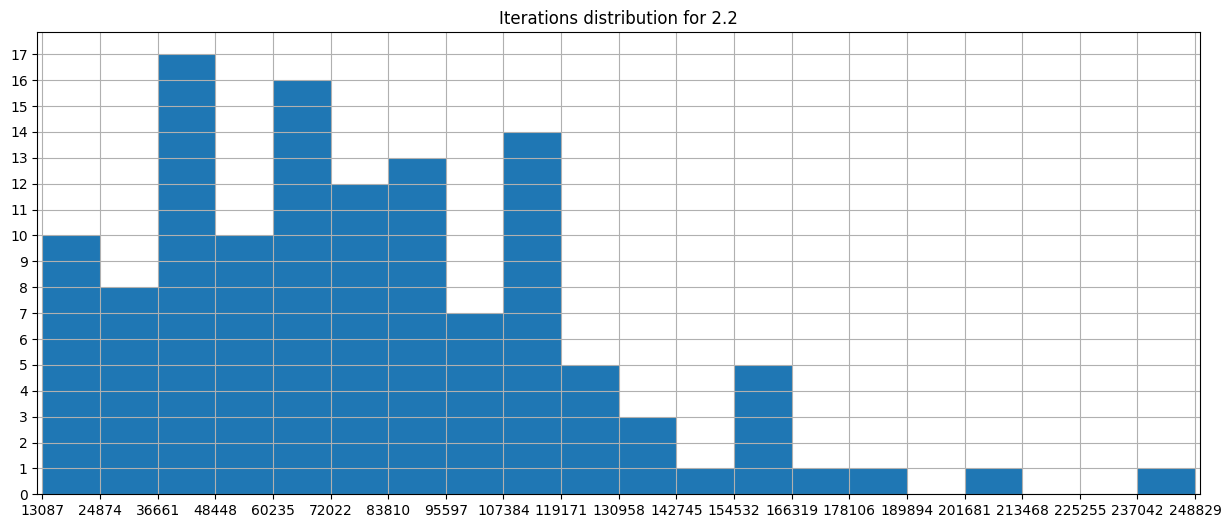

In [22]:
print(f"Number of iterations: {N}", end='\n\n')
for key in general_stats:
    print('Attack ' + key, end=':\n')
    print(f'General number of iterations: {general_stats[key][0]}')
    print(f'Mean value: {general_stats[key][1]}')
    print(f'Variance: {general_stats[key][2]}')
    print(f'Standart deviance: {general_stats[key][3]}')
    print(f'Confidence interval: {general_stats[key][4]}')
    print()

    plot_hist([count for _, count in general_stats[key][5]], key)
    